In [25]:
import torch
import torch.nn.functional as F
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt # for making figures
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from pprint import pprint

In [26]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [27]:
import re
import random
import string
import torch
from pprint import pprint

def preprocess_text_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Preprocess the text
    # Remove unnecessary characters, such as tabs and extra whitespaces
    text = text.replace('\t', ' ')
    text = ' '.join(text.split())

    # Tokenize whitespace and newline characters
    text = text.replace('\n', '')
    
    
    return text

file_path = r'C:\Users\DELL\OneDrive\Desktop\Paul.txt'  # Use raw string or double backslashes
words = preprocess_text_file(file_path)

# Display first 10 preprocessed tokens
print(words[:10])


March 2024


In [28]:
len(words)

78717

In [29]:
# Create vocabulary of unique characters
vocab = sorted(list(set(''.join(words))))
# Add special tokens to vocabulary
stoi = {s:i+1 for i,s in enumerate(vocab)}
stoi['_'] = 0
# Build the vocabulary of characters and mappings to/from integers
itos = {i: s for s, i in stoi.items()}
pprint(itos)

{0: '_',
 1: ' ',
 2: '!',
 3: '"',
 4: '%',
 5: "'",
 6: '(',
 7: ')',
 8: ',',
 9: '-',
 10: '.',
 11: '/',
 12: '0',
 13: '1',
 14: '2',
 15: '3',
 16: '4',
 17: '5',
 18: '6',
 19: '7',
 20: '8',
 21: '9',
 22: ':',
 23: ';',
 24: '?',
 25: 'A',
 26: 'B',
 27: 'C',
 28: 'D',
 29: 'E',
 30: 'F',
 31: 'G',
 32: 'H',
 33: 'I',
 34: 'J',
 35: 'K',
 36: 'L',
 37: 'M',
 38: 'N',
 39: 'O',
 40: 'P',
 41: 'R',
 42: 'S',
 43: 'T',
 44: 'U',
 45: 'V',
 46: 'W',
 47: 'Y',
 48: 'Z',
 49: '[',
 50: ']',
 51: 'a',
 52: 'b',
 53: 'c',
 54: 'd',
 55: 'e',
 56: 'f',
 57: 'g',
 58: 'h',
 59: 'i',
 60: 'j',
 61: 'k',
 62: 'l',
 63: 'm',
 64: 'n',
 65: 'o',
 66: 'p',
 67: 'q',
 68: 'r',
 69: 's',
 70: 't',
 71: 'u',
 72: 'v',
 73: 'w',
 74: 'x',
 75: 'y',
 76: 'z',
 77: '—'}


In [30]:
block_size = 5  # context length: how many characters do we take to predict the next one?
X, Y = [], []
context = [0] * block_size
for w in words[:]:
    
    for ch in w:
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix]  # Crop and append
  
# Move data to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X = torch.tensor(X).to(device)
Y = torch.tensor(Y).to(device)

_____ ---> M
____M ---> a
___Ma ---> r
__Mar ---> c
_Marc ---> h
March --->  
arch  ---> 2
rch 2 ---> 0
ch 20 ---> 2
h 202 ---> 4
 2024 --->  
2024  ---> (
024 ( ---> T
24 (T ---> h
4 (Th ---> i
 (Thi ---> s
(This --->  
This  ---> i
his i ---> s
is is --->  
s is  ---> a
 is a --->  
is a  ---> t
s a t ---> a
 a ta ---> l
a tal ---> k
 talk --->  
talk  ---> I
alk I --->  
lk I  ---> g
k I g ---> a
 I ga ---> v
I gav ---> e
 gave --->  
gave  ---> t
ave t ---> o
ve to --->  
e to  ---> 1
 to 1 ---> 4
to 14 --->  
o 14  ---> a
 14 a ---> n
14 an ---> d
4 and --->  
 and  ---> 1
and 1 ---> 5
nd 15 --->  
d 15  ---> y
 15 y ---> e
15 ye ---> a
5 yea ---> r
 year --->  
year  ---> o
ear o ---> l
ar ol ---> d
r old ---> s
 olds --->  
olds  ---> a
lds a ---> b
ds ab ---> o
s abo ---> u
 abou ---> t
about --->  
bout  ---> w
out w ---> h
ut wh ---> a
t wha ---> t
 what --->  
what  ---> t
hat t ---> o
at to --->  
t to  ---> d
 to d ---> o
to do --->  
o do  ---> n
 do n ---> o
do no ---> w

In [31]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([78717, 5]), torch.int64, torch.Size([78717]), torch.int64)

In [32]:
# Embedding layer for the context

emb_dim = 4
emb = torch.nn.Embedding(len(stoi), emb_dim)

In [33]:
emb.weight

Parameter containing:
tensor([[ 4.1636e-01, -7.2858e-01, -1.7733e-01, -5.2711e-01],
        [ 6.2466e-01,  3.2817e-01, -3.6952e-01, -2.7804e-01],
        [ 9.8280e-01, -7.5061e-01, -1.6681e-02, -6.2601e-01],
        [-7.7104e-02, -6.5128e-01,  3.4271e-01,  5.9512e-01],
        [-1.4099e+00,  1.6995e+00,  1.0113e+00, -8.0216e-02],
        [-7.5430e-01, -4.1236e-01, -3.8138e-01,  1.9428e-01],
        [ 1.5338e+00,  9.2737e-02, -7.2745e-01,  1.1022e-01],
        [ 2.5107e-01, -2.9773e-01,  3.2390e-01, -1.5464e+00],
        [ 8.9608e-01,  6.9490e-01, -8.7232e-01,  7.0654e-01],
        [-1.2595e+00, -3.3088e-01, -1.3019e+00, -4.9715e-01],
        [-1.1177e+00, -1.8155e+00, -6.3175e-01,  1.1254e+00],
        [ 5.0637e-01,  2.1534e-01, -1.5210e-02,  1.0487e+00],
        [-9.7988e-01, -2.9709e-01,  2.1373e-03, -5.0042e-01],
        [ 9.4643e-01,  2.1423e+00, -1.8836e+00, -9.4647e-01],
        [ 4.4881e-01,  2.4981e-01, -4.2453e-01,  6.7160e-01],
        [ 1.2531e+00, -9.9409e-01, -1.6116e+00, 

In [34]:
emb.weight.shape

torch.Size([78, 4])

<Axes: >

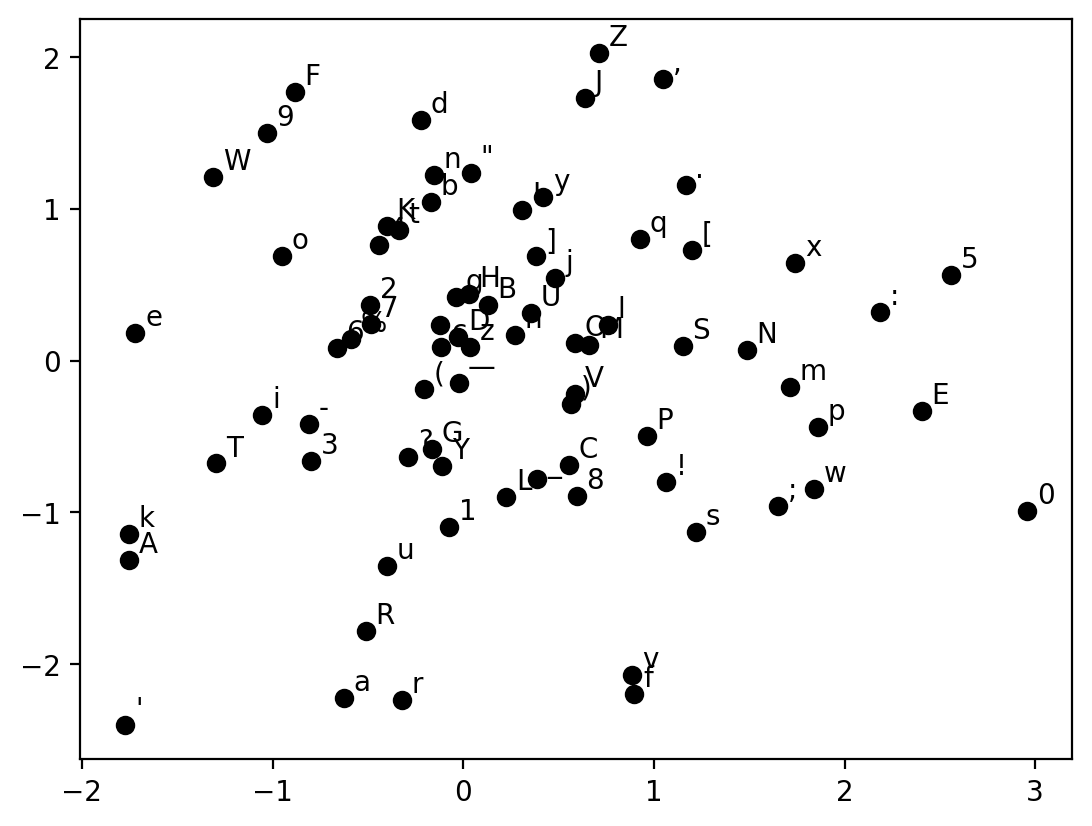

In [35]:
# Function to visualize the embedding in 2d space

def plot_emb(emb, itos, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    for i in range(len(itos)):
        x, y = emb.weight[i].detach().cpu().numpy()
        ax.scatter(x, y, color='k')
        ax.text(x + 0.05, y + 0.05, itos[i])
    return ax

plot_emb(emb, itos)

In [35]:
class NextChar(nn.Module):
  def __init__(self, block_size, vocab_size, emb_dim, hidden_size):
    super().__init__()
    self.emb = nn.Embedding(vocab_size, emb_dim)
    self.lin1 = nn.Linear(block_size * emb_dim, hidden_size)
    self.lin2 = nn.Linear(hidden_size, vocab_size)

  def forward(self, x):
    x = self.emb(x)
    x = x.view(x.shape[0], -1)
    x = torch.sin(self.lin1(x))
    x = self.lin2(x)
    return x

In [36]:
model = NextChar(block_size, len(stoi), emb_dim, 10).to(device)
#model = torch.compile(model)

g = torch.Generator()
g.manual_seed(4000002)
def generate_text(model, input_text, itos, stoi, block_size,  length =100):
    context = [0] * block_size
    input_indices = [stoi[ch] for ch in input_text]

    if(len(input_indices)>block_size):
        context = input_indices[-block_size:]
    else:
        context[block_size-len(input_text):] = input_indices
    text = ''
    for i in range(length):
        x = torch.tensor(context).view(1, -1).to(device)
        y_pred = model(x)
        ix = torch.distributions.categorical.Categorical(logits=y_pred).sample().item()
        ch = itos[ix]
        if ch == '_':
            text += ''
        else:
            text += ch
        context = context[1:] + [ix]
    return text


# Example usage
input_text = "Artificial Intelligence"
k = 30
# generated_text = generate_text(model, itos, stoi, block_size, input_text, k)
# print(generated_text)
for i in range(10):
    print(generate_text(model, input_text, itos, stoi, block_size, k))

31LYeHmBq9FNp8Fd8u!i-a64LlW62"
'Y%1s-]FS4:[K0)9.SBzPwzBM-qgeN
eD—BE—?)2pfIpwNxc—4L;o 2:fNO 
zHuIqwe)vk:F%y,YjFAcVk12POnNIM
RUVlsB RWHk22,JAEJejnE—'Y[Rx .
lp3vyl9(U;d]VoYy;eOfIt—Y'?pszD
PWkI;t7ekS/34I?(p:ubmV9,k4"(hO
 VD2)Oh[ka2ETlp1w5FF-bqI7ub7P
7fGg7quT4TSIRFww0tT5pO8ZcW?LP[
4'-nL-pD.3ZgVLMvnT9tM%RTikB.e"


In [37]:
for param_name, param in model.named_parameters():
    print(param_name, param.shape)

emb.weight torch.Size([78, 4])
lin1.weight torch.Size([10, 20])
lin1.bias torch.Size([10])
lin2.weight torch.Size([78, 10])
lin2.bias torch.Size([78])


In [38]:
# Train the model

loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.AdamW(model.parameters(), lr=0.01)
import time
# Mini-batch training
batch_size = 4096
print_every = 100
elapsed_time = []
for epoch in range(10000):
    start_time = time.time()
    for i in range(0, X.shape[0], batch_size):
        x = X[i:i+batch_size]
        y = Y[i:i+batch_size]
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        loss.backward()
        opt.step()
        opt.zero_grad()
    end_time = time.time()
    elapsed_time.append(end_time - start_time)
    if epoch % print_every == 0:
        print(epoch, loss.item())

0 3.1365232467651367
100 2.1003661155700684
200 2.0922391414642334
300 2.091803550720215
400 2.0914833545684814
500 2.0940661430358887


KeyboardInterrupt: 

<Axes: >

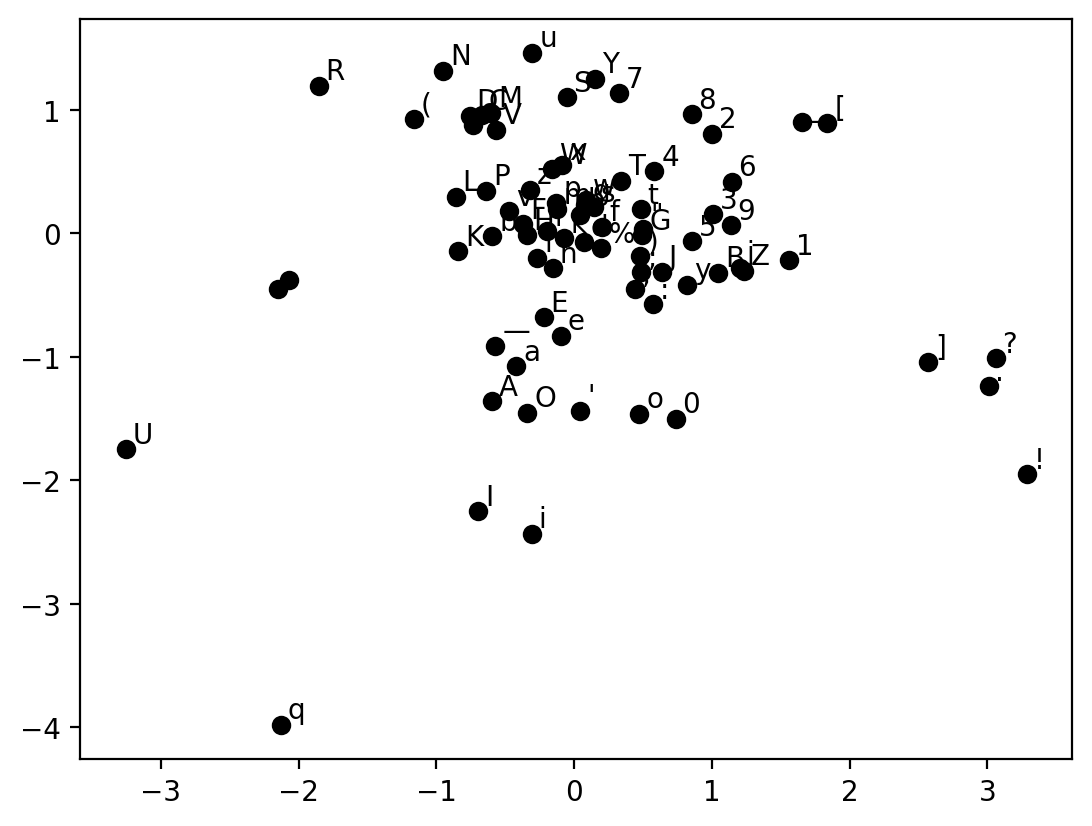

In [47]:
# Visualize the embedding

plot_emb(model.emb, itos)

In [39]:
# Generate names from trained model
input_text1 = "April 1995"
k = 500
print(generate_text(model, input_text1, itos, stoi, block_size, k))

tiy ompis therk nogitr or undy alre bikingins er ow istre rigich at apdat nralth fo. The wre maed sisfow rrifttian istr inme so sporrog coreats if yoog id thas an a gutin'd a teull thas, the there at icpokirtere ob lousesce rutuld in el st you sowooldt. Maltne dofuro ghit seiinth yous anmortinker are, uf taad in ass cure exed fe'ring yous ex ouls wimeaenkev, you a so frake you. Mant ousin: laytings fayowns they. Theins, pe 50toot dotiweout ootru wowore in caeveanceane thoal itace is a the ityter


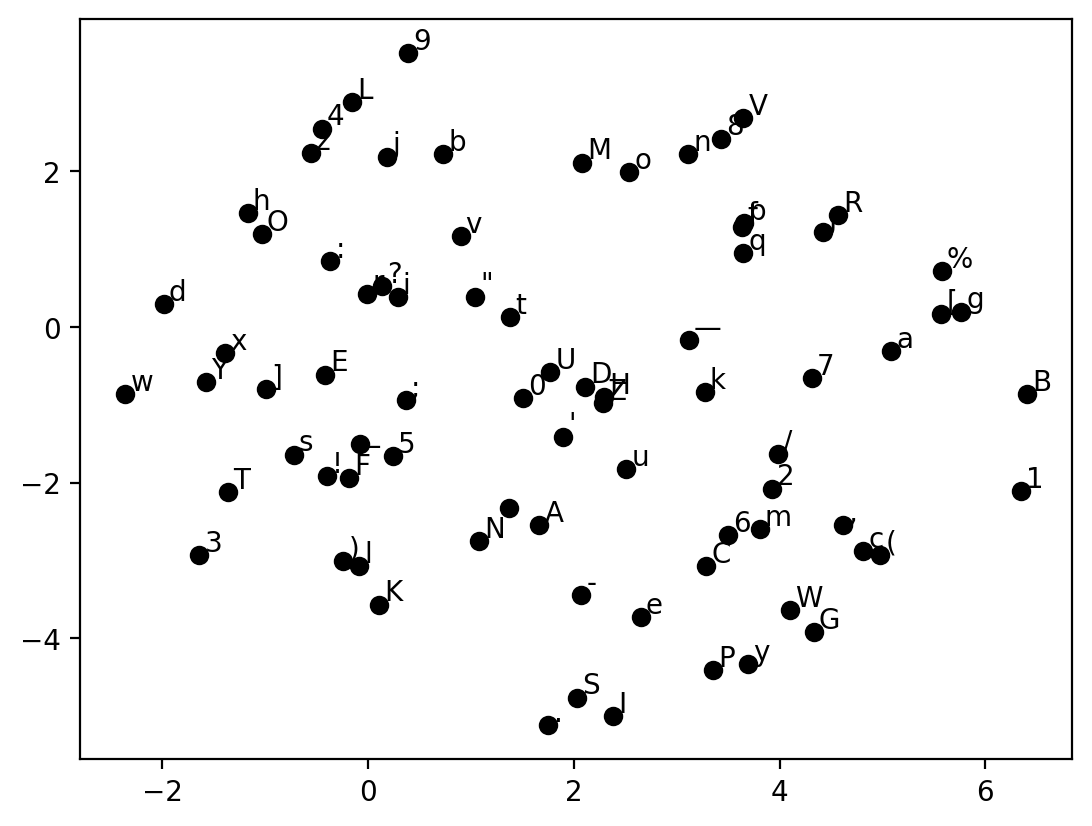

In [40]:
import matplotlib.pyplot as plt
import torch
from sklearn.manifold import TSNE

# Function to visualize the embedding in 2d space using t-SNE
def plot_emb_tsne(emb, itos, ax=None):
    emb_weights = emb.weight.detach().cpu().numpy()
    tsne = TSNE(n_components=2, random_state=42)
    emb_tsne = tsne.fit_transform(emb_weights)

    if ax is None:
        fig, ax = plt.subplots()
    for i in range(len(itos)):
        x, y = emb_tsne[i]
        ax.scatter(x, y, color='k')
        ax.text(x + 0.05, y + 0.05, itos[i])
    return ax

# Example usage:
fig, ax = plt.subplots()
plot_emb_tsne(emb, itos, ax)
plt.show()